In [1]:
import torch
import json

In [2]:
def load_losses(filename="losses.json"):
    with open(filename, "r") as f:
        data = json.load(f)
    if "track_tokens_seen" in data:
        track_tokens_seen = data["track_tokens_seen"]
    else:
        track_tokens_seen = []
    return data["train_losses"], data["val_losses"], track_tokens_seen

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def plot_losses(epochs_seen, tokens_seen, train_losses, val_losses):
    fig, ax1 = plt.subplots(figsize=(5, 3))

    # Plot training and validation loss against epochs
    ax1.plot(epochs_seen, train_losses, label="Training loss")
    ax1.plot(epochs_seen, val_losses, linestyle="-.", label="Validation loss")
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")
    ax1.legend(loc="upper right")
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))  # only show integer labels on x-axis

    if len(tokens_seen) > 0:
        ax2 = ax1.twiny()  # Create a second x-axis that shares the same y-axis
        ax2.plot(tokens_seen, train_losses, alpha=0)  # Invisible plot for aligning ticks
        ax2.set_xlabel("Tokens seen")

    fig.tight_layout()  # Adjust layout to make room
    plt.savefig("loss-plot-sea-12-1536.pdf")
    plt.show()

GPT Model:

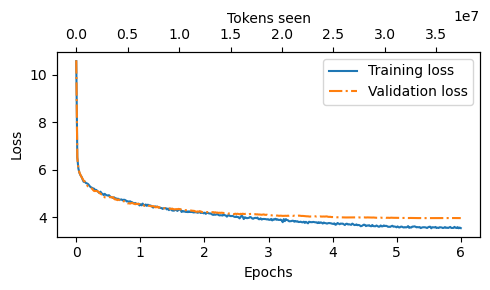

In [5]:
num_epochs = 6
train_losses, val_losses, track_tokens_seen = load_losses("model_768_8_8_losses.json")

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, track_tokens_seen, train_losses, val_losses)

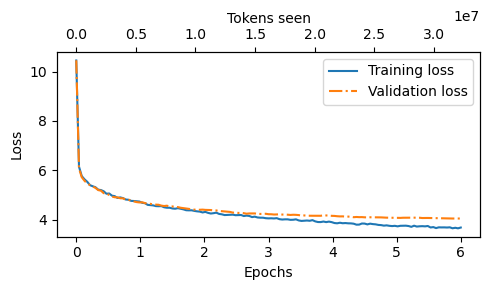

In [5]:
num_epochs = 6
train_losses, val_losses, track_tokens_seen = load_losses("model_640_10_8_0_1_losses.json")

epochs_tensor = torch.linspace(0, num_epochs, len(train_losses))
plot_losses(epochs_tensor, track_tokens_seen, train_losses, val_losses)

SAE (6, 3072):

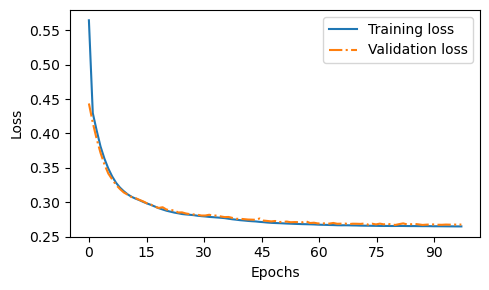

In [5]:
num_epochs = 97
sae_train_losses, sae_val_losses, sae_track_tokens_seen = load_losses("sae_model_6_3072_losses.json")

epochs_tensor = torch.linspace(0, num_epochs, len(sae_train_losses))
plot_losses(epochs_tensor, [], sae_train_losses, sae_val_losses)

SAE (12, 3072):

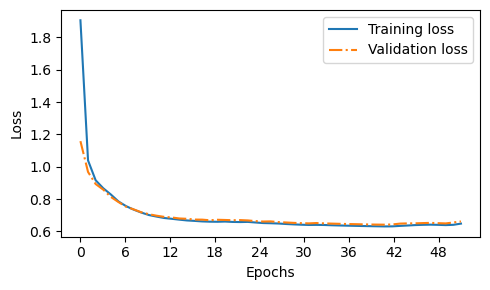

In [6]:
num_epochs = 51
sae_train_losses, sae_val_losses, sae_track_tokens_seen = load_losses("sae_model_12_3072_losses.json")

epochs_tensor = torch.linspace(0, num_epochs, len(sae_train_losses))
plot_losses(epochs_tensor, [], sae_train_losses, sae_val_losses)